In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import gaussian_kde

Dataset Overview
Number of records: 74283
Number of features: 25
Columns: ['Country', 'Age', 'Gender', 'Education Level', 'BMI', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level', 'Family History of Alzheimer’s', 'Cognitive Test Score', 'Depression Level', 'Sleep Quality', 'Dietary Habits', 'Air Pollution Exposure', 'Employment Status', 'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level', 'Income Level', 'Stress Levels', 'Urban vs Rural Living', 'Alzheimer’s Diagnosis']

First 5 rows of the dataset:
        Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0         Spain   90    Male                1  33.0                  Medium   
1     Argentina   72    Male                7  29.9                  Medium   
2  South Africa   86  Female               19  22.9                    High   
3         China   53    Male               17  31.2                     Low   
4 

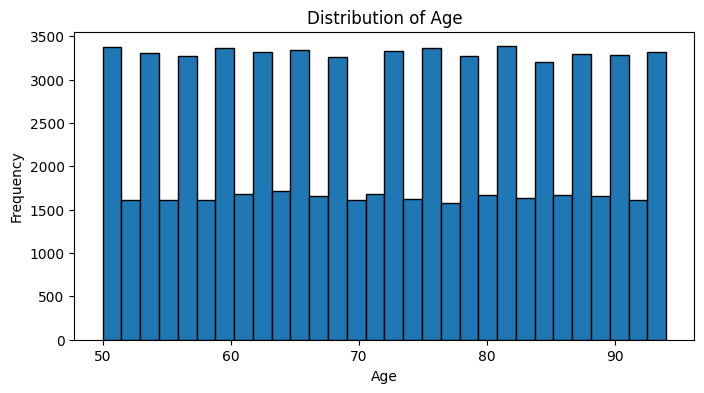

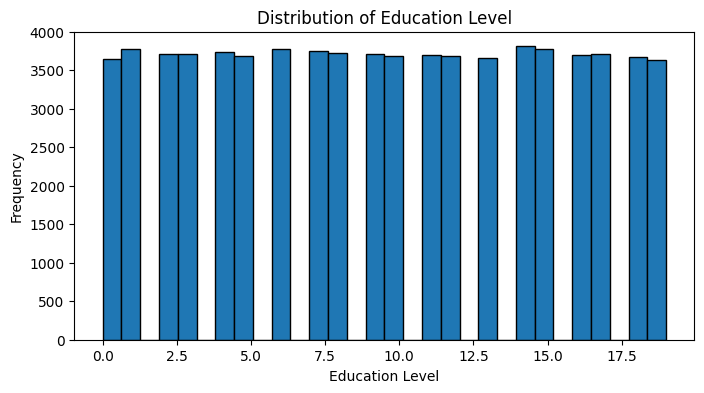

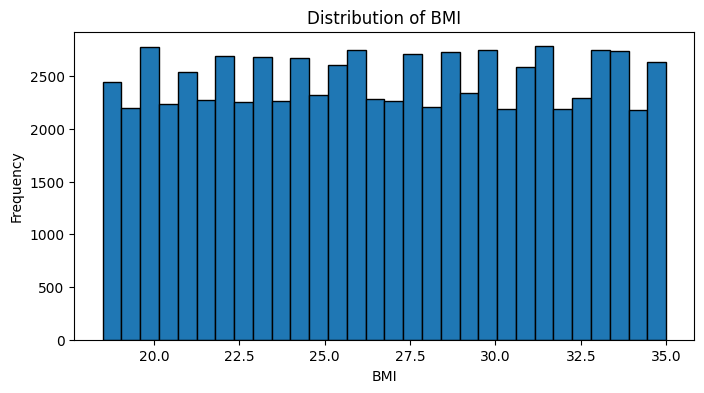

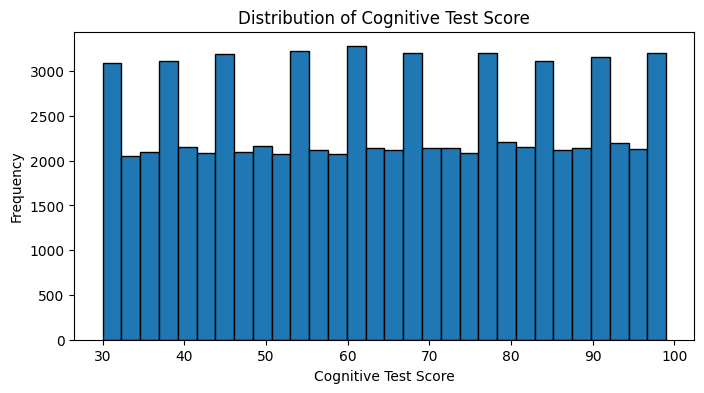

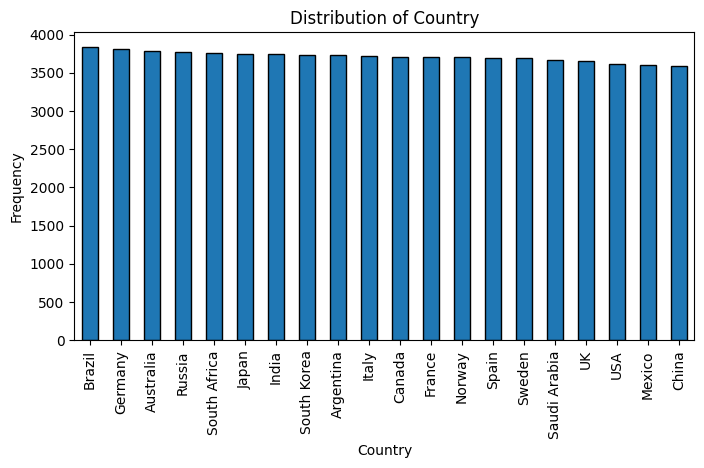

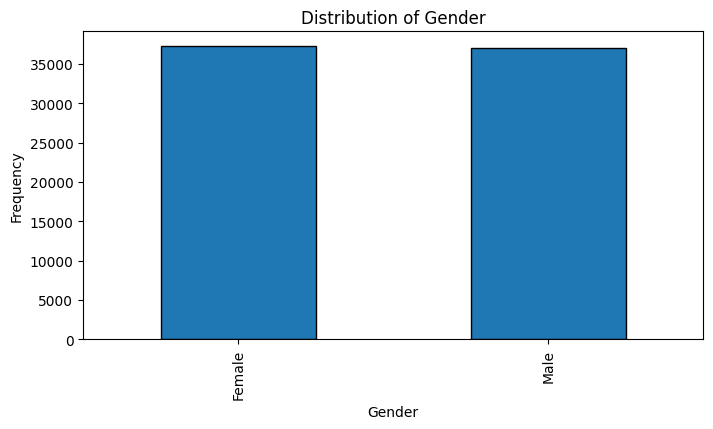

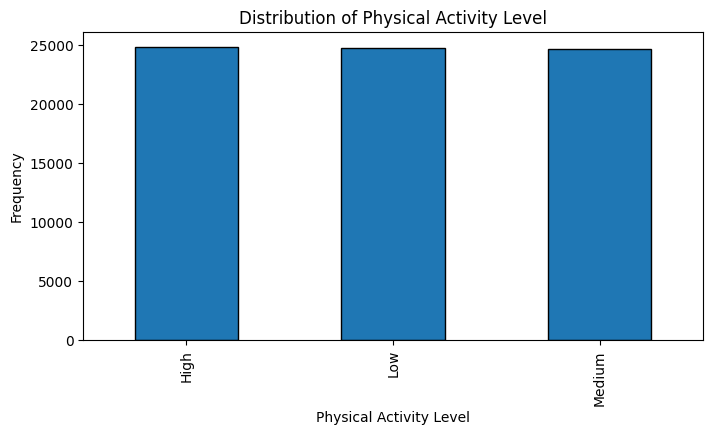

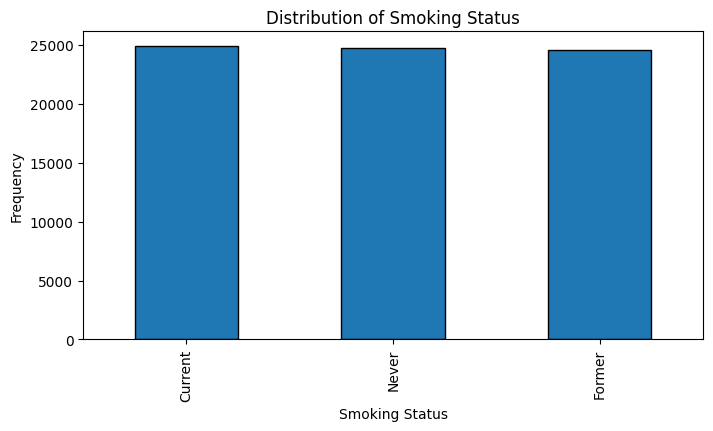

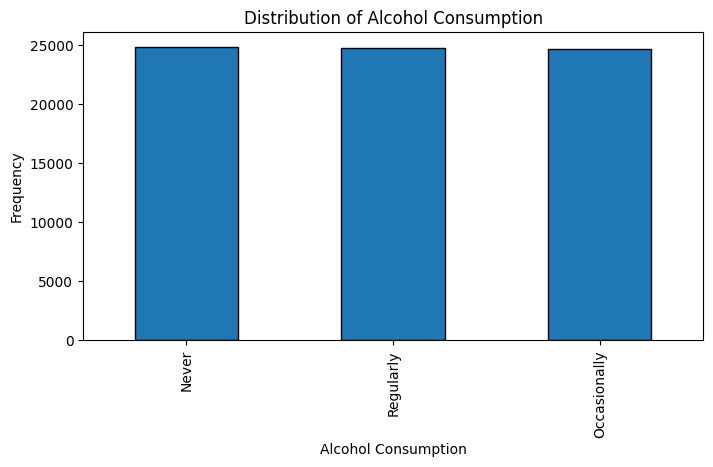

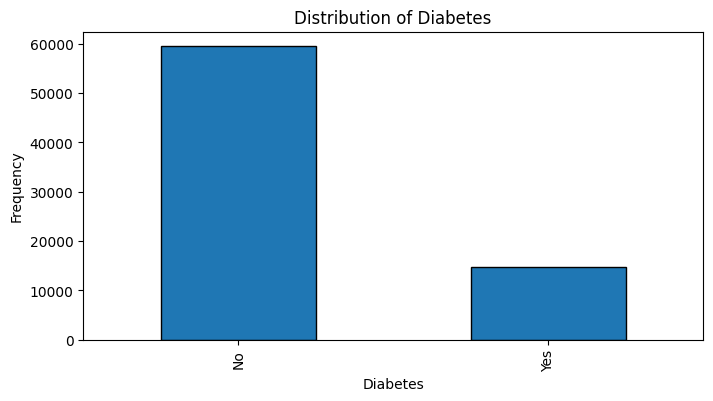

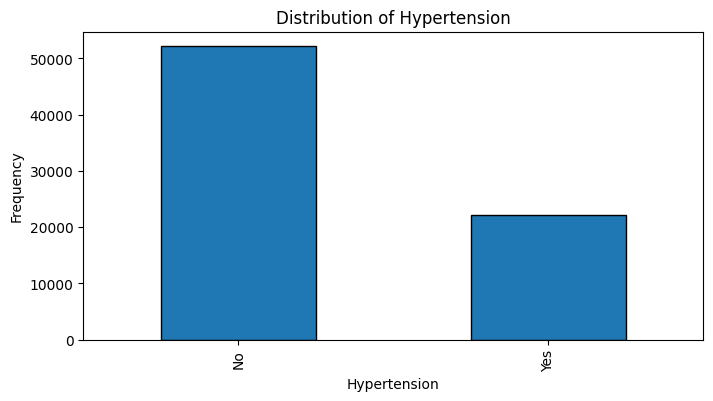

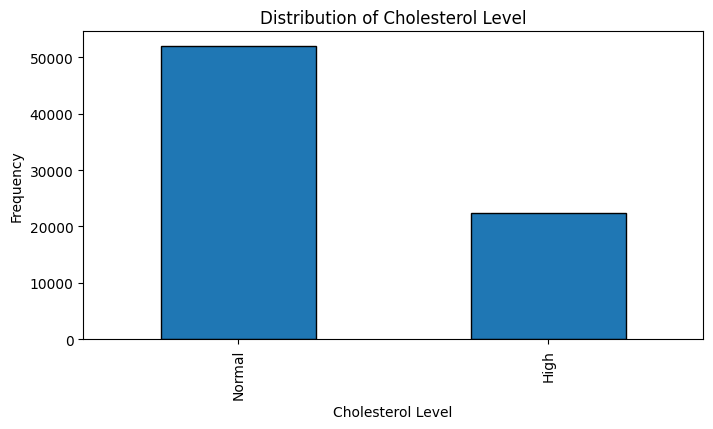

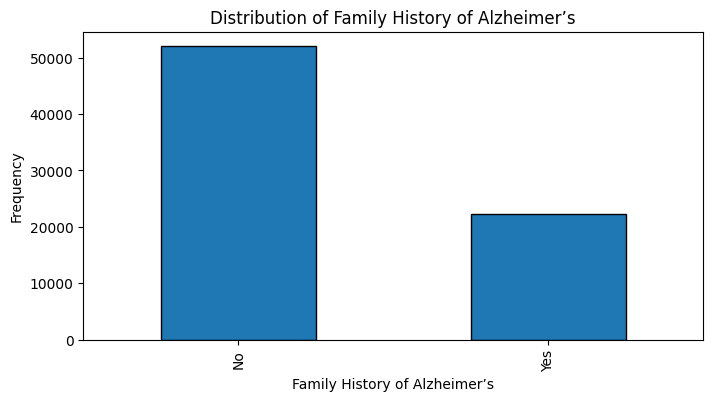

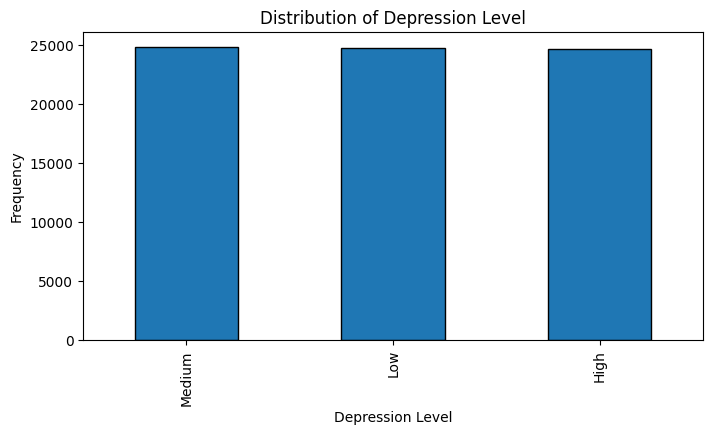

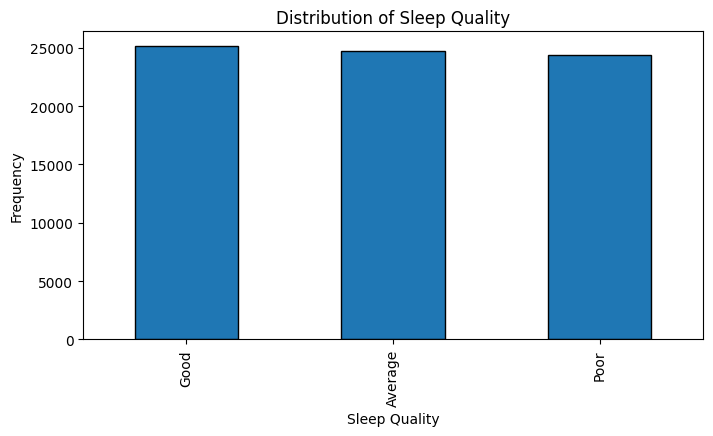

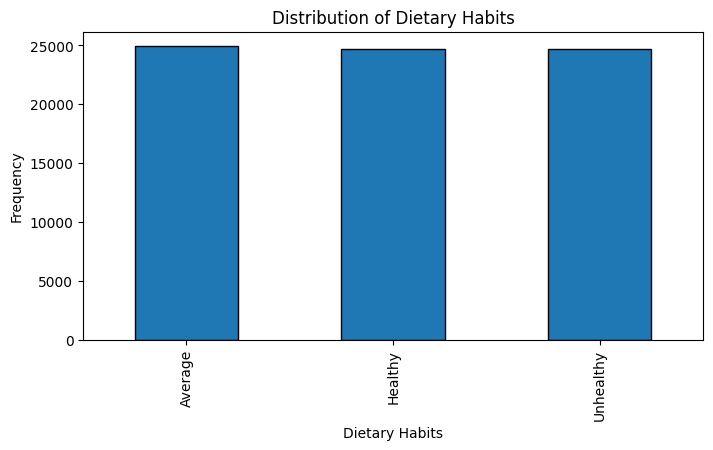

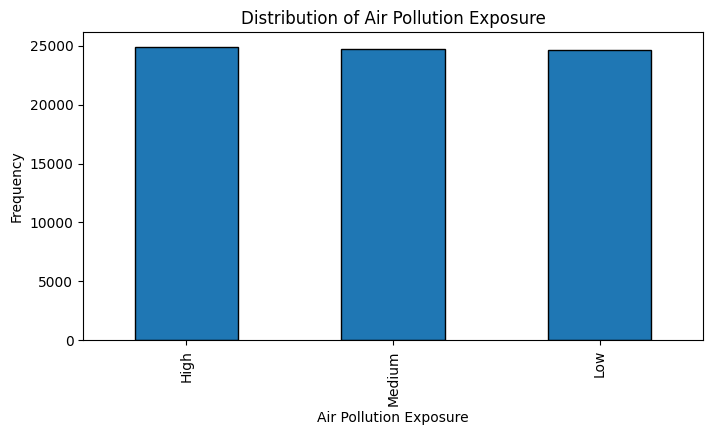

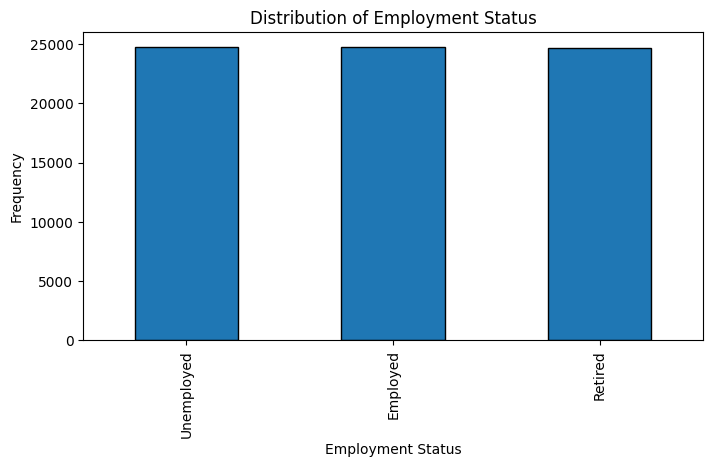

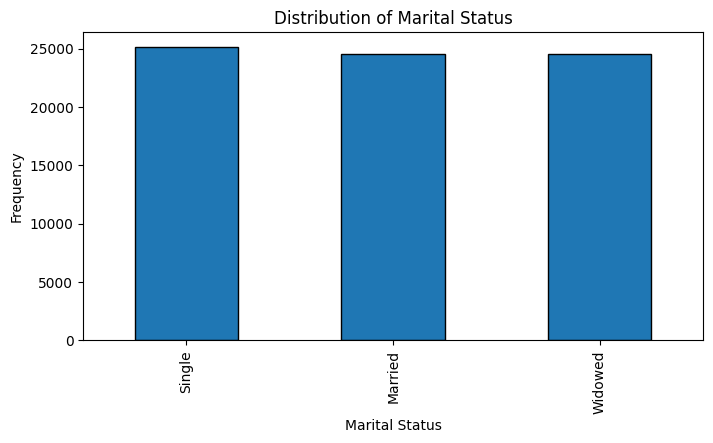

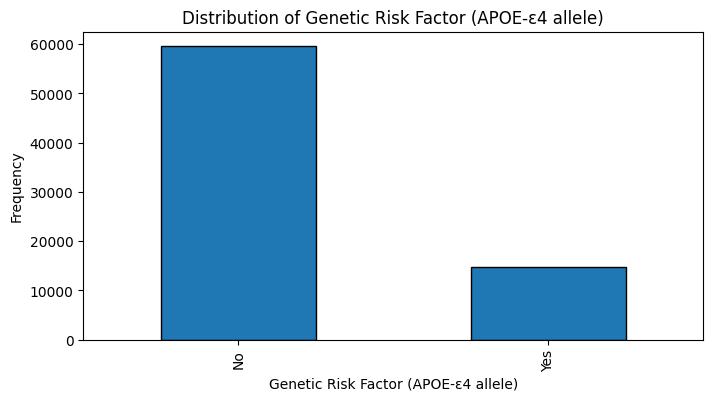

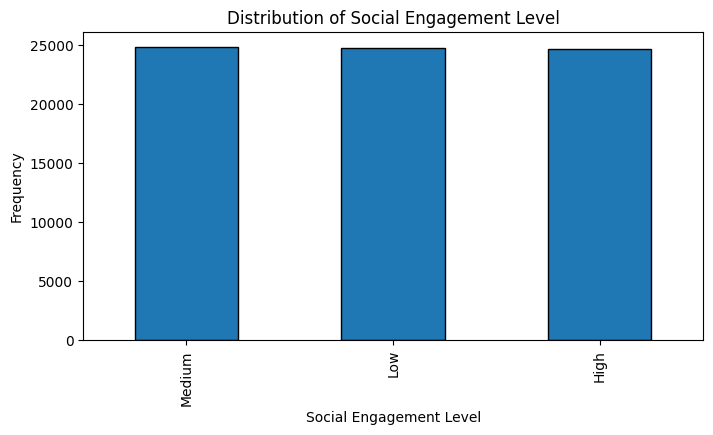

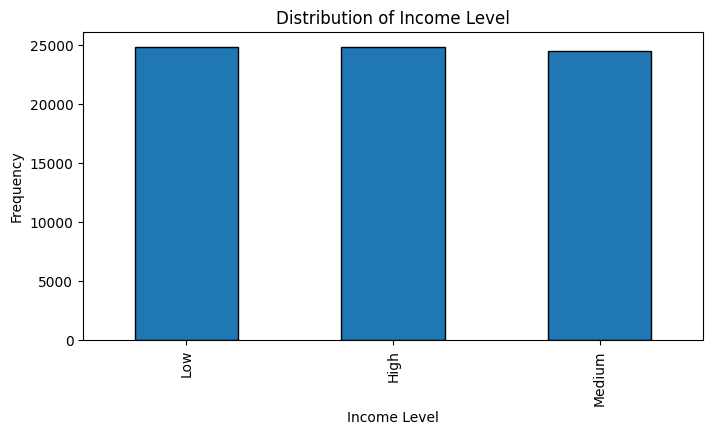

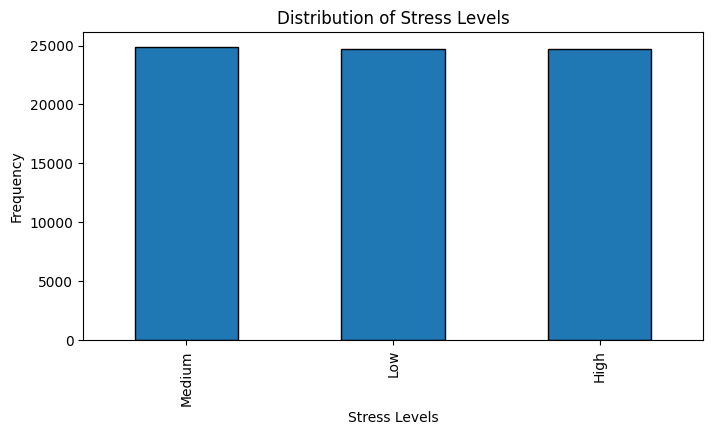

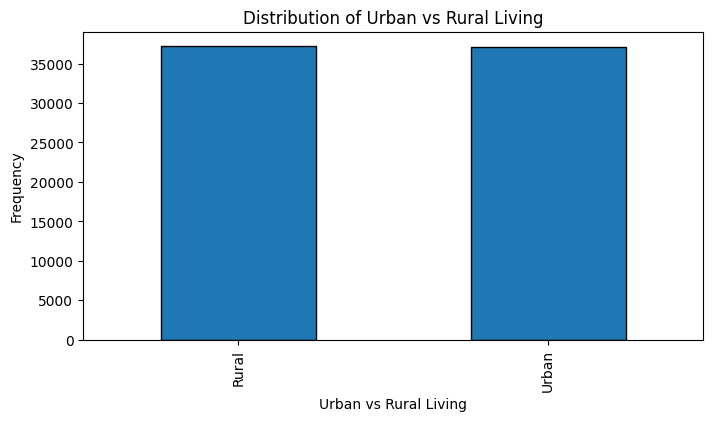

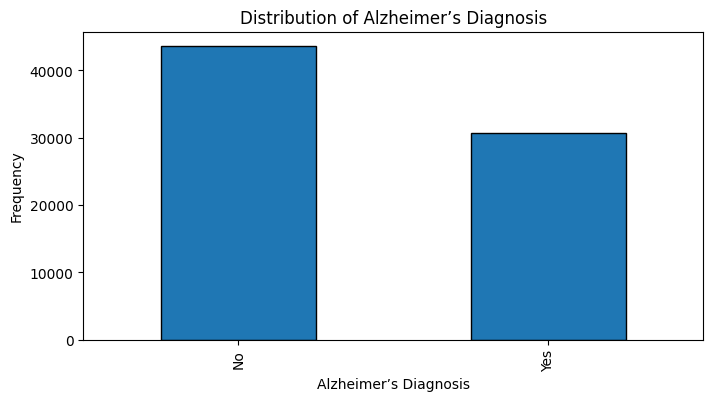

In [4]:
data = pd.read_csv('alzheimers_prediction_dataset.csv')

print("Dataset Overview")
print("Number of records:", data.shape[0])
print("Number of features:", data.shape[1])
print("Columns:", data.columns.tolist())

print("\nFirst 5 rows of the dataset:")
print(data.head())

print("\nData Information:")
data.info()

print("\nMissing Values in Each Column:")
print(data.isnull().sum())

print("\nDescriptive Statistics for Numerical Features:")
print(data.describe())

duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicates}")

numerical_features = ['Age', 'Education Level', 'BMI', 'Cognitive Test Score']
for feature in numerical_features:
    if feature in data.columns:
        plt.figure(figsize=(8, 4))
        plt.hist(data[feature].dropna(), bins=30, edgecolor='black')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

categorical_features = [col for col in data.columns if data[col].dtype == 'object']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    data[feature].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [6]:
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicates dropped.")

categorical_columns = [
    'Country', 'Gender', 'Physical Activity Level', 'Smoking Status',
    'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level',
    'Family History of Alzheimer’s', 'Depression Level', 'Sleep Quality',
    'Dietary Habits', 'Air Pollution Exposure', 'Employment Status',
    'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)',
    'Social Engagement Level', 'Income Level', 'Stress Levels',
    'Urban vs Rural Living', "Alzheimer's Diagnosis"
]

numerical_features = ['Age', 'Education Level', 'BMI', 'Cognitive Test Score']
for feature in numerical_features:
    if feature in data.columns:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        print(f"{feature}: Found {outliers.shape[0]} outliers (values outside [{lower_bound:.2f}, {upper_bound:.2f}]).")

scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[numerical_features] = scaler.fit_transform(data[numerical_features])
print("Numerical features have been standardized.")

print("Summary statistics for scaled numerical features:")
print(data_scaled[numerical_features].describe())
data_scaled.to_csv("preprocessed_dataset.csv")


Age: Found 0 outliers (values outside [28.00, 116.00]).
Education Level: Found 0 outliers (values outside [-11.00, 29.00]).
BMI: Found 0 outliers (values outside [10.40, 43.20]).
Cognitive Test Score: Found 0 outliers (values outside [-5.50, 134.50]).
Numerical features have been standardized.
Summary statistics for scaled numerical features:
                Age  Education Level           BMI  Cognitive Test Score
count  7.428300e+04     7.428300e+04  7.428300e+04          7.428300e+04
mean   2.133073e-17     5.452248e-17 -2.495360e-16         -2.587427e-16
std    1.000007e+00     1.000007e+00  1.000007e+00          1.000007e+00
min   -1.692110e+00    -1.648002e+00 -1.737933e+00         -1.719548e+00
25%   -8.446953e-01    -9.531929e-01 -8.564409e-01         -8.760057e-01
50%    2.719233e-03    -8.468222e-02  4.063489e-03          1.715660e-02
75%    8.501337e-01     7.838285e-01  8.645679e-01          8.606988e-01
max    1.697548e+00     1.652339e+00  1.725072e+00          1.704241e+0

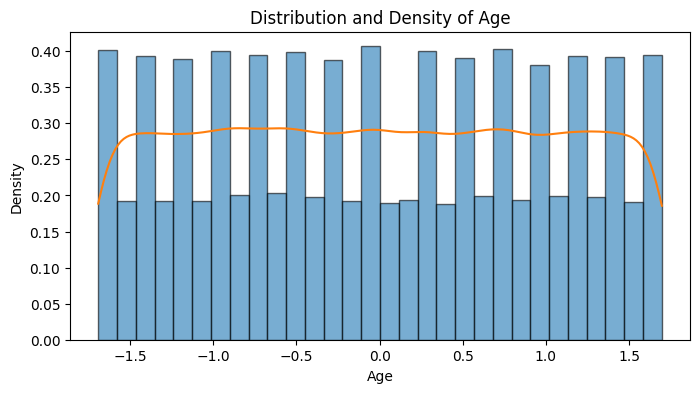

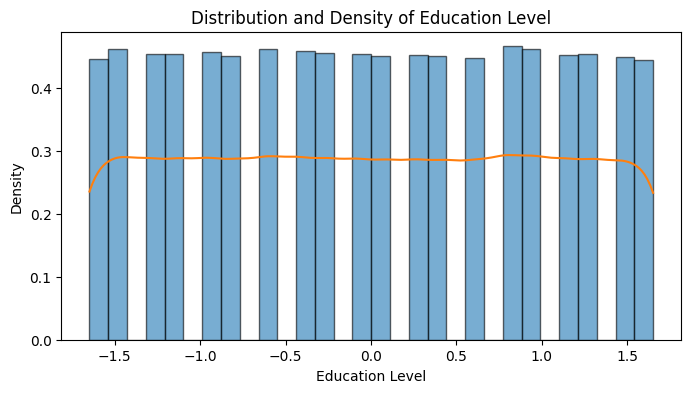

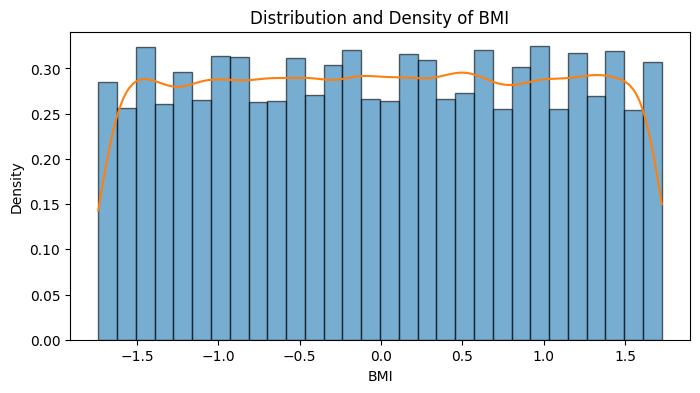

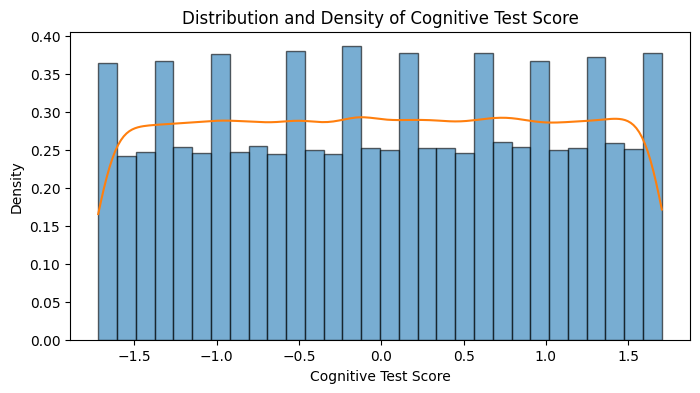

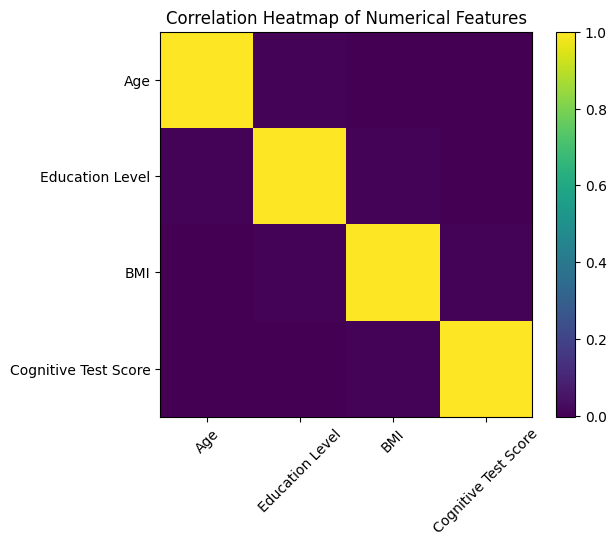

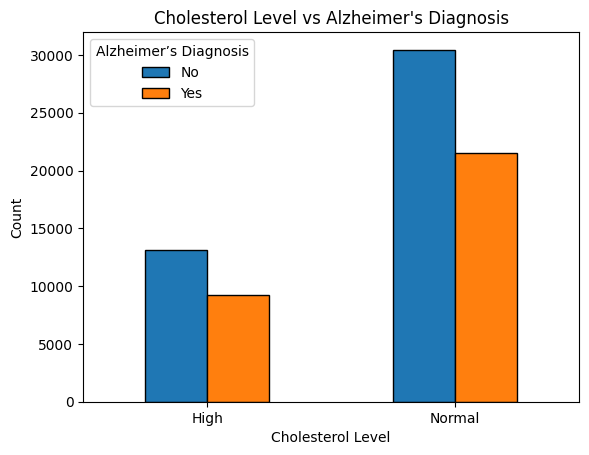

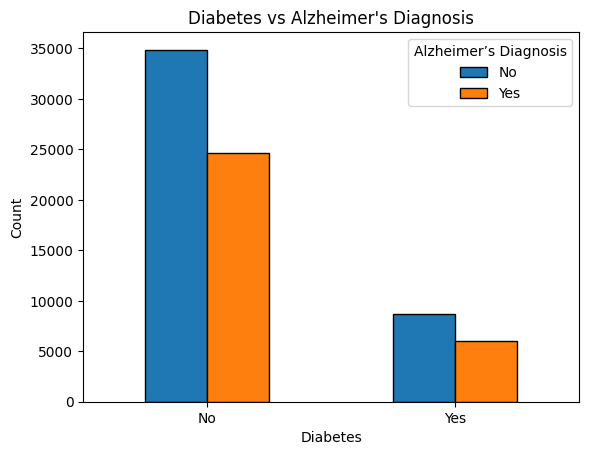

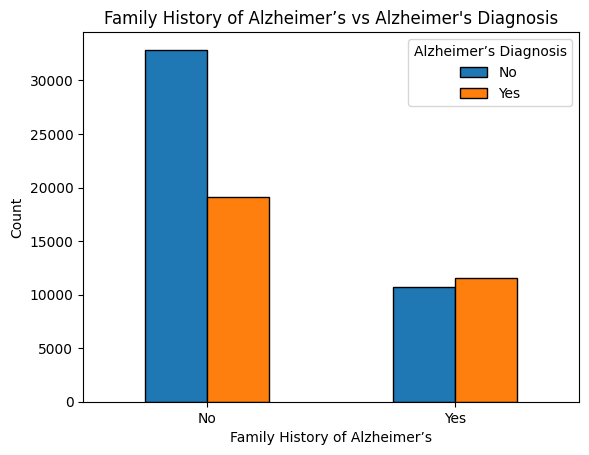

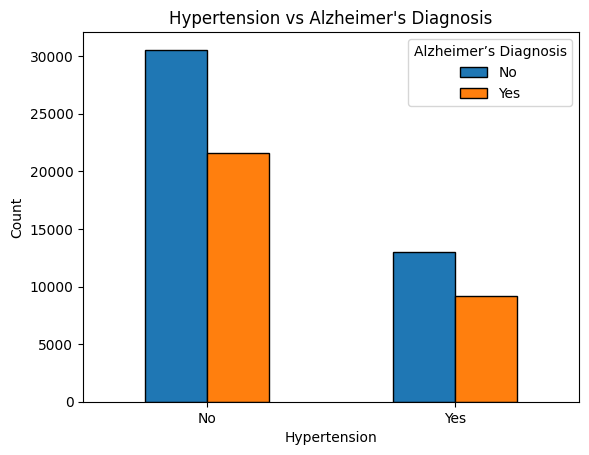

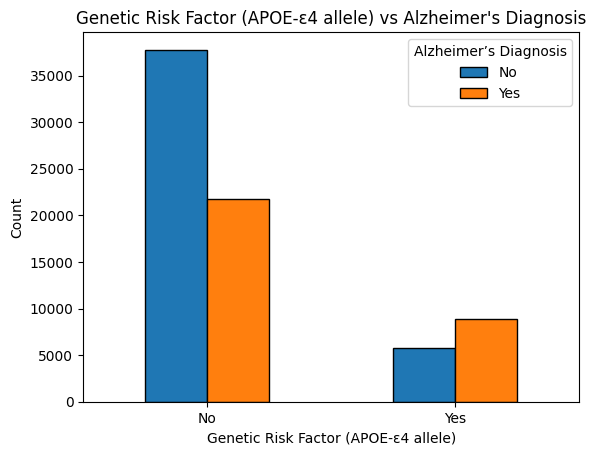

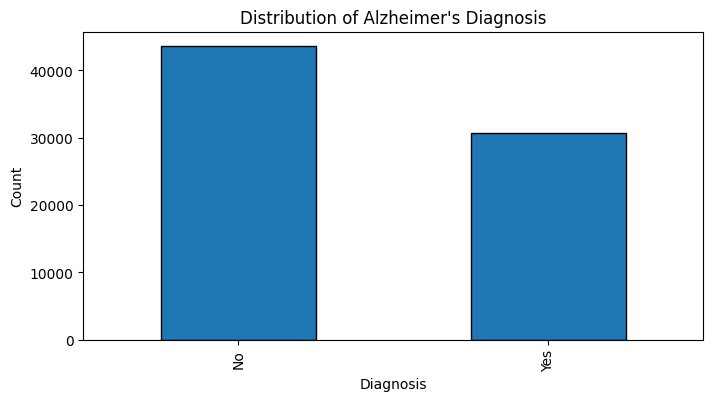

In [10]:
numerical_features = ['Age', 'Education Level', 'BMI', 'Cognitive Test Score']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.hist(data_scaled[feature].dropna(), bins=30, edgecolor='black', density=True, alpha=0.6)

    density = gaussian_kde(data_scaled[feature].dropna())
    xs = np.linspace(data_scaled[feature].min(), data_scaled[feature].max(), 200)
    plt.plot(xs, density(xs))

    plt.title(f'Distribution and Density of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

correlation_matrix = data_scaled[numerical_features].corr()
plt.figure(figsize=(6, 5))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(numerical_features)), numerical_features, rotation=45)
plt.yticks(range(len(numerical_features)), numerical_features)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

categorical_features = [
    'Cholesterol Level', 'Diabetes',
    'Family History of Alzheimer’s', 'Hypertension',
    'Genetic Risk Factor (APOE-ε4 allele)'
]

for feature in categorical_features:
    counts = data_scaled.groupby([feature, "Alzheimer’s Diagnosis"]).size().unstack(fill_value=0)
    counts.plot(kind='bar', edgecolor='black')
    plt.title(f'{feature} vs Alzheimer\'s Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

plt.figure(figsize=(8, 4))
data_scaled["Alzheimer’s Diagnosis"].value_counts().plot(kind='bar', edgecolor='black')
plt.title("Distribution of Alzheimer's Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()


In [11]:
data_fe = data_scaled.copy()

binary_columns = [
    'Diabetes', 'Hypertension', 'Cholesterol Level',
    'Family History of Alzheimer’s', 'Genetic Risk Factor (APOE-ε4 allele)', "Urban vs Rural Living",
    "Alzheimer’s Diagnosis"
]
binary_mapping = {'false': 0, 'true': 1, 'no': 0, 'yes': 1, 'normal': 0, 'high': 1, 'rural': 0, 'urban': 1,}

for col in binary_columns:
    if col in data_fe.columns:
        data_fe[col] = data_fe[col].astype(str).str.lower().map(binary_mapping)
        print(f"Encoded binary feature: {col}")

ordinal_mappings = {
    'Physical Activity Level': {'low': 0, 'medium': 1, 'high': 2},
    'Alcohol Consumption': {'never': 0, 'occasionally': 1, 'regularly': 2},
    'Depression Level': {'low': 0, 'medium': 1, 'high': 2},
    'Sleep Quality': {'poor': 0, 'average': 1, 'good': 2},
    'Dietary Habits': {'unhealthy': 0, 'average': 1, 'healthy': 2},
    'Air Pollution Exposure': {'low': 0, 'medium': 1, 'high': 2},
    'Social Engagement Level': {'low': 0, 'medium': 1, 'high': 2},
    'Income Level': {'low': 0, 'medium': 1, 'high': 2},
    'Stress Levels': {'low': 0, 'medium': 1, 'high': 2}
}

for col, mapping in ordinal_mappings.items():
    if col in data_fe.columns:
        data_fe[col] = data_fe[col].astype(str).str.lower().map(mapping)
        print(f"Ordinally encoded: {col}")

nominal_columns = ['Country', 'Gender', 'Smoking Status', 'Employment Status', 'Marital Status']
data_fe = pd.get_dummies(data_fe, columns=nominal_columns, drop_first=True)
print("Applied one-hot encoding to nominal features:", nominal_columns)

if 'Age' in data_fe.columns and 'Genetic Risk Factor (APOE-ε4 allele)' in data_fe.columns:
    data_fe['Age_x_APOE'] = data_fe['Age'] * data_fe['Genetic Risk Factor (APOE-ε4 allele)']
    print("Created interaction term: Age_x_APOE")

# from sklearn.decomposition import PCA
# numerical_cols = ['Age', 'Education Level', 'BMI', 'Cognitive Test Score', 'Age_x_APOE']
# pca = PCA(n_components=0.95)  # Retain 95% variance.
# data_pca = pca.fit_transform(data_fe[numerical_cols])
# print(f"PCA applied: Reduced numerical features to {data_pca.shape[1]} components.")

print("Feature engineering complete. The dataset is now ready for modeling.")

Encoded binary feature: Diabetes
Encoded binary feature: Hypertension
Encoded binary feature: Cholesterol Level
Encoded binary feature: Family History of Alzheimer’s
Encoded binary feature: Genetic Risk Factor (APOE-ε4 allele)
Encoded binary feature: Urban vs Rural Living
Encoded binary feature: Alzheimer’s Diagnosis
Ordinally encoded: Physical Activity Level
Ordinally encoded: Alcohol Consumption
Ordinally encoded: Depression Level
Ordinally encoded: Sleep Quality
Ordinally encoded: Dietary Habits
Ordinally encoded: Air Pollution Exposure
Ordinally encoded: Social Engagement Level
Ordinally encoded: Income Level
Ordinally encoded: Stress Levels
Applied one-hot encoding to nominal features: ['Country', 'Gender', 'Smoking Status', 'Employment Status', 'Marital Status']
Created interaction term: Age_x_APOE
Feature engineering complete. The dataset is now ready for modeling.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate, StratifiedKFold

X = data_fe.drop(columns=["Alzheimer’s Diagnosis"])
y = data_fe["Alzheimer’s Diagnosis"]

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,
    test_size=0.15,
    random_state=42,
    stratify=y
)

validation_ratio = 0.15 / 0.85

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=validation_ratio,
    random_state=42,
    stratify=y_train_val
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': LinearSVC(random_state=42)
}

scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)

    print(f"{name} Performance:")
    print("  Accuracy: {:.4f} ± {:.4f}".format(np.mean(cv_results['test_accuracy']),
                                               np.std(cv_results['test_accuracy'])))
    print("  F1 Score: {:.4f} ± {:.4f}".format(np.mean(cv_results['test_f1']),
                                               np.std(cv_results['test_f1'])))
    print("  ROC AUC:  {:.4f} ± {:.4f}".format(np.mean(cv_results['test_roc_auc']),
                                               np.std(cv_results['test_roc_auc'])))
    print("-" * 50)
    results[name] = cv_results




Training set shape: (51997, 46) (51997,)
Validation set shape: (11143, 46) (11143,)
Test set shape: (11143, 46) (11143,)
Evaluating Logistic Regression...
Logistic Regression Performance:
  Accuracy: 0.7153 ± 0.0029
  F1 Score: 0.6404 ± 0.0027
  ROC AUC:  0.7908 ± 0.0040
--------------------------------------------------
Evaluating Decision Tree...
Decision Tree Performance:
  Accuracy: 0.6385 ± 0.0038
  F1 Score: 0.5649 ± 0.0045
  ROC AUC:  0.6280 ± 0.0038
--------------------------------------------------
Evaluating Random Forest...


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold

data_fe = pd.read_csv("fe_dataset.csv")

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
grid_search_gb.fit(X_train, y_train)

print("Best Gradient Boosting Parameters:", grid_search_gb.best_params_)
print("Best cross-validation ROC AUC for Gradient Boosting:", grid_search_gb.best_score_)

best_gb = grid_search_gb.best_estimator_
y_val_pred_gb = best_gb.predict(X_val)
y_val_proba_gb = best_gb.predict_proba(X_val)[:, 1]

print("\nGradient Boosting Validation Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_gb))
print("F1 Score:", f1_score(y_val, y_val_pred_gb))
print("ROC AUC:", roc_auc_score(y_val, y_val_proba_gb))


param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
grid_search_rf.fit(X_train, y_train)

print("\nBest Random Forest Parameters:", grid_search_rf.best_params_)
print("Best cross-validation ROC AUC for Random Forest:", grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_
y_val_pred_rf = best_rf.predict(X_val)
y_val_proba_rf = best_rf.predict_proba(X_val)[:, 1]

print("\nRandom Forest Validation Performance:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("F1 Score:", f1_score(y_val, y_val_pred_rf))
print("ROC AUC:", roc_auc_score(y_val, y_val_proba_rf))
